In [1]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
import nltk.sentiment.vader
import os
import datetime
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

//anaconda/lib/python3.5/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
dataset = pd.read_csv("csm subforums all posts cleaned.csv")

In [3]:
dataset.head()

,Unnamed: 0,ID,Subforum,subsectionpage,all_thread_ids,Thread_Title,Thread_Page,Date_of_post,Username,Post,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,1,1,Assembly Hall,1,1498941,[csm6] may summit topics thread index,1,2011-04-19,Killer2,so we don't lose sight of all the summit topic...,...,"3,61","1,81","0,00","0,60","0,00","0,30","1,20","3,61","0,90","0,30"
1,2,2,Assembly Hall,1,1498941,[csm6] may summit topics thread index,1,2011-04-21,Shepard Book,what happened to the post of the long list of ...,...,"0,00","0,00","0,00","4,17","0,00","0,00","0,00","0,00","0,00","0,00"
2,3,3,Assembly Hall,1,1498941,[csm6] may summit topics thread index,1,2011-04-22,Olivia Ironsides,"csm5 was bad, fixing minor things/voting in th...",...,"4,55","0,00","0,00","0,00","0,00","0,00","0,00","0,00","9,09","4,55"
3,4,4,Assembly Hall,1,1498941,[csm6] may summit topics thread index,1,2011-04-25,Consortium Agent,csm6 opted to forego player base consideration...,...,"0,00","1,27","0,00","0,00","0,00","0,00","0,00","2,53","2,53","0,00"
4,5,5,Assembly Hall,1,1498941,[csm6] may summit topics thread index,1,2011-04-25,Killer2,"actually, you'll find that the topics we plan ...",...,"2,33","0,00","0,00","0,00","0,00","2,33","0,00","2,33","0,00","0,00"


In [4]:
posts = dataset['Post']

In [14]:
type(posts)

pandas.core.series.Series

In [61]:
#tokens = nltk.word_tokenize(posts[0])

post0_sent = nltk.sentiment.vader.SentiText(posts[0])
post0 = posts[0]

In [62]:
post0_sent.words_and_emoticons

['so',
 'we',
 "don't",
 'lose',
 'sight',
 'of',
 'all',
 'the',
 'summit',
 'topic',
 'threads',
 "here's",
 'an',
 'index',
 'with',
 'short',
 'summary',
 'about',
 'each',
 'one.team',
 'bff',
 'the',
 'thousand',
 'little',
 'things.:in',
 'this',
 'thread',
 'we',
 'welcome',
 'the',
 'community',
 'to',
 'offer',
 'suggestions',
 'about',
 'how',
 'csm',
 'can',
 'help',
 'team',
 'bff',
 'focus',
 'their',
 'efforts',
 'to',
 'get',
 'even',
 'more',
 'bang',
 'for',
 'buck".',
 'we',
 'are',
 'not',
 'just',
 'looking',
 'for',
 'specific',
 'little',
 'things',
 'that',
 'annoy',
 'you',
 'and',
 'that',
 "you'd",
 'like',
 'fixed',
 'but',
 'also',
 'suggestions',
 'about',
 'improving',
 'the',
 'process',
 'of',
 'identifying',
 'and',
 'prioritizing',
 'them.ship',
 'balance:in',
 'this',
 'thread',
 "we're",
 'looking',
 'for',
 'everything',
 'relating',
 'to',
 'ship',
 'balancing',
 'encompassing',
 'everything',
 'from',
 'individual',
 'ships',
 'to',
 'how',
 'the

In [63]:
file = open("post0.txt","w")
file.write(posts[0])
file.close()


In [64]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

In [65]:
def print_sentiment_scores(sentence):
    snt = analyser.polarity_scores(sentence)
    

In [75]:
# y = posts[0:100].apply(analyser.polarity_scores)
y[0]

{'compound': 0.996, 'neg': 0.013, 'neu': 0.801, 'pos': 0.186}

In [84]:
N = len(posts)
compound = [None for i in range(N)]
negative = [None for i in range(N)]
neutral = [None for i in range(N)]
positive = [None for i in range(N)]

In [88]:
# Very slow. Roughly 20 mins to process 318k posts @ 16k posts/min
for i in range(N):
    try:
        scores = analyser.polarity_scores(posts[i])
        compound[i] = scores["compound"]
        negative[i] = scores["neg"]
        neutral[i] = scores["neu"]
        positive[i] = scores["pos"]
    except:
        print("exception at: "+str(i))
    if i%1000 == 0:
        print(str(i)+"   "+print(datetime.datetime.now()))
    

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


In [93]:
sentiment_scores = pd.DataFrame({'compound':compound,'negative':negative,'neutral':neutral,'positive':positive})

In [98]:
len(sentiment_scores) == len(dataset)

True

In [119]:
dataset['Date_of_post'] =  pd.to_datetime(dataset['Date_of_post'],infer_datetime_format=True)
dataset_sent = dataset.join(sentiment_scores)


KeyboardInterrupt: 

In [201]:
dataset_sent = dataset_sent.dropna()

True

In [179]:
dataset2 = dataset_sent.groupby([pd.Grouper(key='Date_of_post', freq='W-MON')])['negative','positive'].mean().reset_index().sort_values('Date_of_post')


In [246]:
window = 5

ds2 = dataset2.dropna()
ds3 = ds2.loc[:,ds2.columns!="Date_of_post"].rolling(window).mean().dropna()
ds3 = ds3.join(ds2["Date_of_post"])

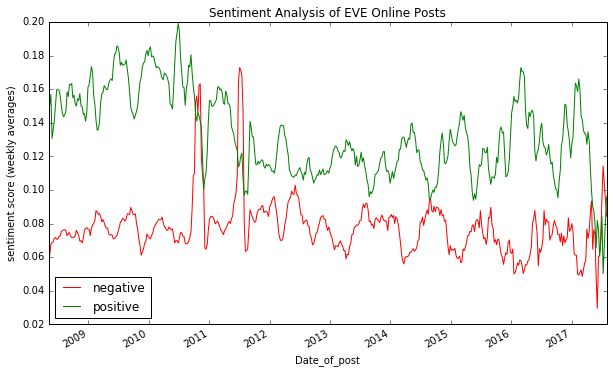

//anaconda/lib/python3.5/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


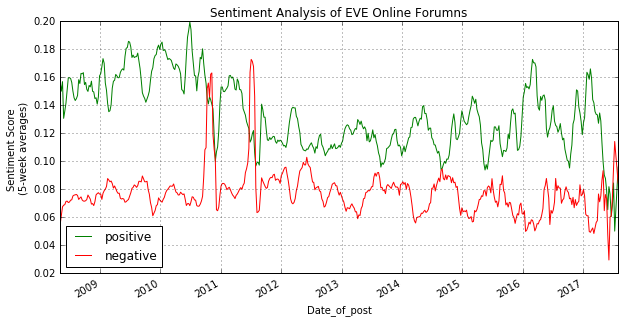

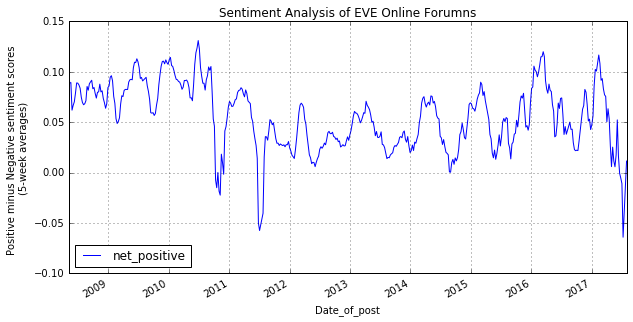

In [304]:
plt.rcParams['figure.figsize'] = [10, 5]
# plt.subplots(2, 2, sharex='col')

title_txt = 'Sentiment Analysis of EVE Online Forumns'

ds3.plot.line(x='Date_of_post',y=['positive','negative'], style=['g-','r-'])
plt.title(title_txt)
plt.ylabel('Sentiment Score \n('+str(window)+'-week averages)')
plt.legend(loc=3)
plt.grid()


cname = "net_positive"
ds4 = ds3
ds4[cname] = ds3['positive']-ds3['negative']
ds4.plot.line(x='Date_of_post',y=cname)
plt.grid()
plt.title(title_txt)
plt.ylabel('Positive minus Negative sentiment scores \n('+ str(window) + '-week averages)')
plt.legend(loc=3)

# plt.show()

In [251]:
### percent of posts that contain "csm"
tf = 0
N = len(dataset_sent)
for i in range(N):
    try:
        if('csm' in dataset_sent.loc[i,'Post']):
            tf+=1
    except:
        N = N-1
tf/N

0.10359500317169218

In [226]:
plt.rcParams['figure.figsize']

[10.0, 10.0]

In [ ]:
ds

In [270]:
ds4 = ds2.join(ds3,rsuffix="_"+str(window)+"_week_avg")
ds3.head()

,negative,positive,Date_of_post,net_positive,net_positive (rolling),net_positive (5-week moving avg)
5,0.055033,0.156918,2008-05-05,0.101886,0.101886,0.101886
6,0.061391,0.150236,2008-05-12,0.088845,0.088845,0.088845
7,0.067620,0.157036,2008-05-19,0.089416,0.089416,0.089416
8,0.068775,0.130823,2008-05-26,0.062049,0.062049,0.062049
9,0.069182,0.136015,2008-06-02,0.066834,0.066834,0.066834


In [266]:
plt.rcParams['figure.figsize'] = [10, 6]

cname = "net_positive ("+ str(window) + "-week moving avg)"

ds4 = ds3.join(ds2)
ds4[cname] = ds3['positive']-ds3['negative']
ds4.plot.line(x='Date_of_post',y=cname)
plt.grid()
plt.title('Sentiment in EVE online forumns')
plt.ylabel('Positive minus Negative sentiment scores \n('+ str(window) + '-week moving avg)')
plt.show()

,negative_5_week_avg,positive_5_week_avg,Date_of_post_5_week_avg,net_positive,net_positive (rolling),net_positive (5-week moving avg),Date_of_post,negative,positive
5,0.055033,0.156918,2008-05-05,0.101886,0.101886,0.101886,2008-05-05,0.065188,0.121887
6,0.061391,0.150236,2008-05-12,0.088845,0.088845,0.088845,2008-05-12,0.070308,0.123674
7,0.067620,0.157036,2008-05-19,0.089416,0.089416,0.089416,2008-05-19,0.075964,0.120428
8,0.068775,0.130823,2008-05-26,0.062049,0.062049,0.062049,2008-05-26,0.065775,0.160189
9,0.069182,0.136015,2008-06-02,0.066834,0.066834,0.066834,2008-06-02,0.068673,0.153899
10,0.071445,0.141782,2008-06-09,0.070337,0.070337,0.070337,2008-06-09,0.076503,0.150720
11,0.071709,0.150819,2008-06-16,0.079110,0.079110,0.079110,2008-06-16,0.071629,0.168862
12,0.070678,0.159731,2008-06-23,0.089052,0.089052,0.089052,2008-06-23,0.070811,0.164984
13,0.071026,0.159825,2008-06-30,0.088799,0.088799,0.088799,2008-06-30,0.067514,0.160663
14,0.072361,0.159342,2008-07-07,0.086981,0.086981,0.086981,2008-07-07,0.075349,0.151484


## Plan Oct 17
### Build "Nomological Network" of negative comments during incarna crisis
1. Select comments that match the date and rate above some threshold for negativity on sentiment
2. Do topic modeling (minimum first pass with out-of-the-box LDA) 
3. Build nomological network (from scratch)
4. Cluster nomological network
5. Examine nomological network
6. Repeat above steps with ALL comments during the crisis
7. Repeat avove steps with negative comments before and after crisis to build a flow diagram

In [ ]:
# selecting negative comments during the crisis